<a href="https://colab.research.google.com/github/ShreedarshM/Mobile-Price-Range-Prediction/blob/main/Mobile_Price_Range_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#<b>Problem Description

##<b>In the competitive mobile phone market companies want to understand sales data of mobile phones and factors which drive the prices. The objective is to find out some relation between features of a mobile phone(eg:- RAM, Internal Memory, etc) and its selling price. In this problem, we do not have to predict the actual price but a price range indicating how high the price is.

<b>

Data Description -

Battery_power - Total energy a battery can store in one time measured in mAh

Blue - Has bluetooth or not

Clock_speed - speed at which microprocessor executes instructions

Dual_sim - Has dual sim support or not

Fc - Front Camera mega pixels

Four_g - Has 4G or not

Int_memory - Internal Memory in Gigabytes

M_dep - Mobile Depth in cm

Mobile_wt - Weight of mobile phone

N_cores - Number of cores of processor

Pc - Primary Camera mega pixels

Px_height - Pixel Resolution Height

Px_width - Pixel Resolution Width

Ram - Random Access Memory in Mega Bytes

Sc_h - Screen Height of mobile in cm

Sc_w - Screen Width of mobile in cm

Talk_time - longest time that a single battery charge will last when you are
Three_g - Has 3G or not

Touch_screen - Has touch screen or not

Wifi - Has wifi or not

Price_range - This is the target variable with value of 0(low cost), 1(medium cost),

2(high cost) and 3(very high cost).

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
#Importing important libraries
import numpy as np
import pandas as pd
import math
import os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV

import warnings
warnings.filterwarnings('ignore')

In [7]:
#Loading the dataset
df = pd.read_csv('/content/drive/MyDrive/Copy of data_mobile_price_range.csv')

In [8]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [9]:
df.tail()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,...,483,754,3919,19,4,2,1,1,1,3


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [11]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


##<b> Exploratory Data Analysis

###<b> a) Univariate Analysis

In [12]:
#Checking the categories of Price range:
df['price_range'].unique()

array([1, 2, 3, 0])

In [13]:
df['price_range'].value_counts()

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

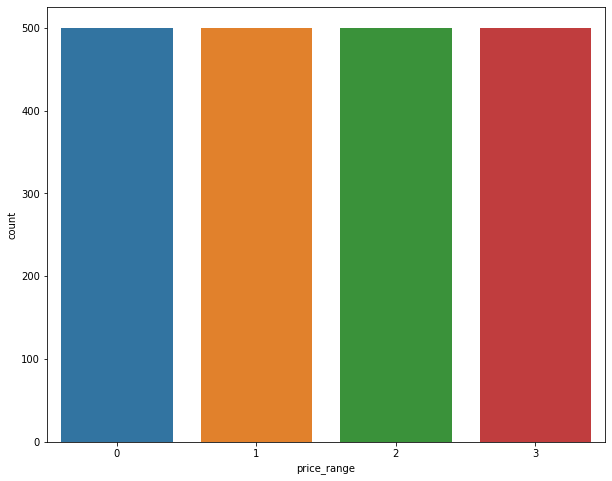

In [14]:
plt.figure(figsize=(10,8))
sns.countplot(x='price_range', data=df)

In [15]:
numerical_features = df.describe().columns
numerical_features = numerical_features.drop('price_range')
dist_col1 = list(numerical_features[0:10])
dist_col2 = list(numerical_features[10:21])

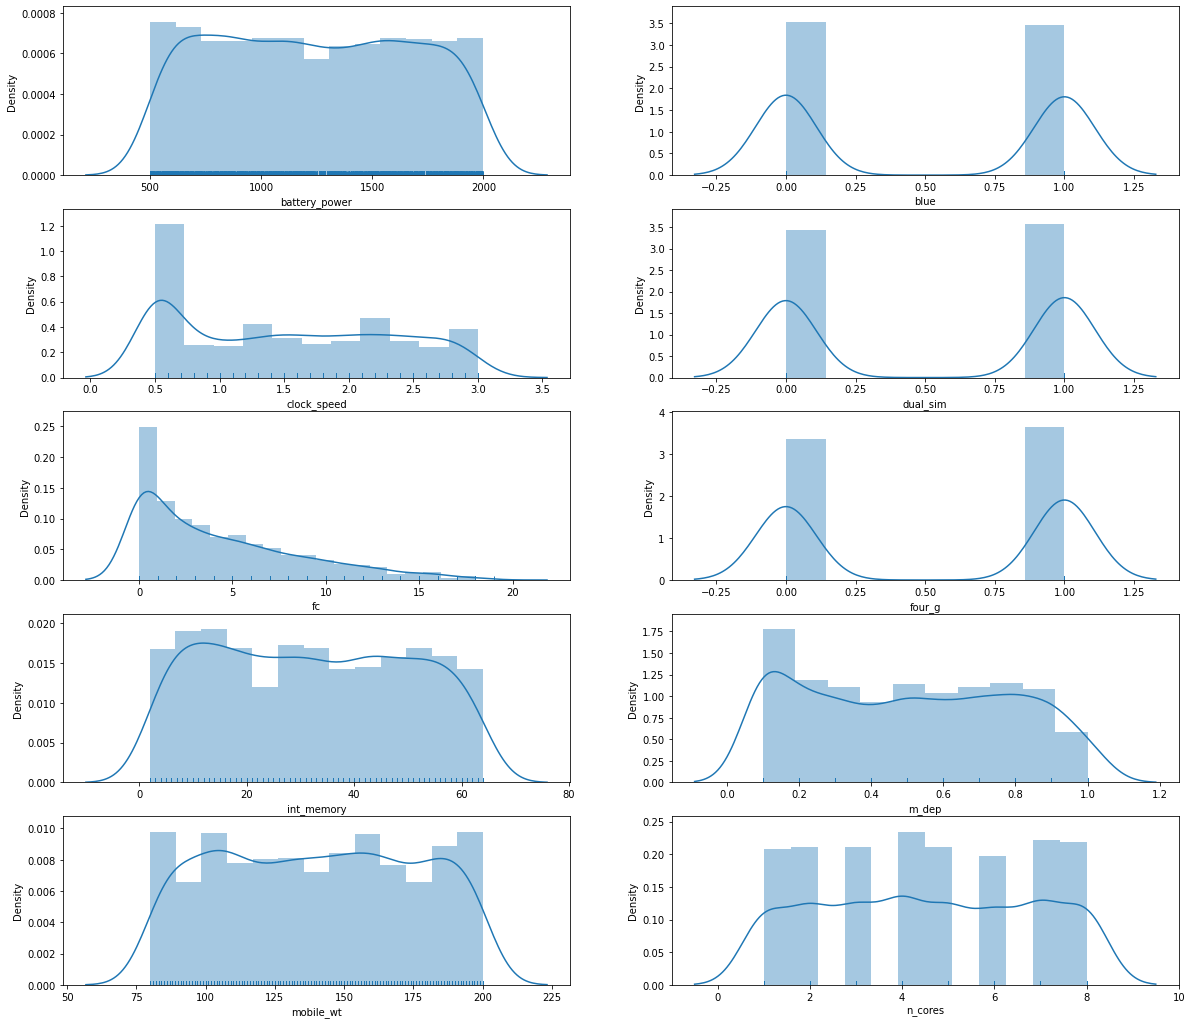

In [16]:
plt.figure(figsize=(20,18))
for i in range(len(dist_col1)):
  plt.subplot(5,2,i+1)
  sns.distplot(df[dist_col1[i]], hist = True, rug = True)


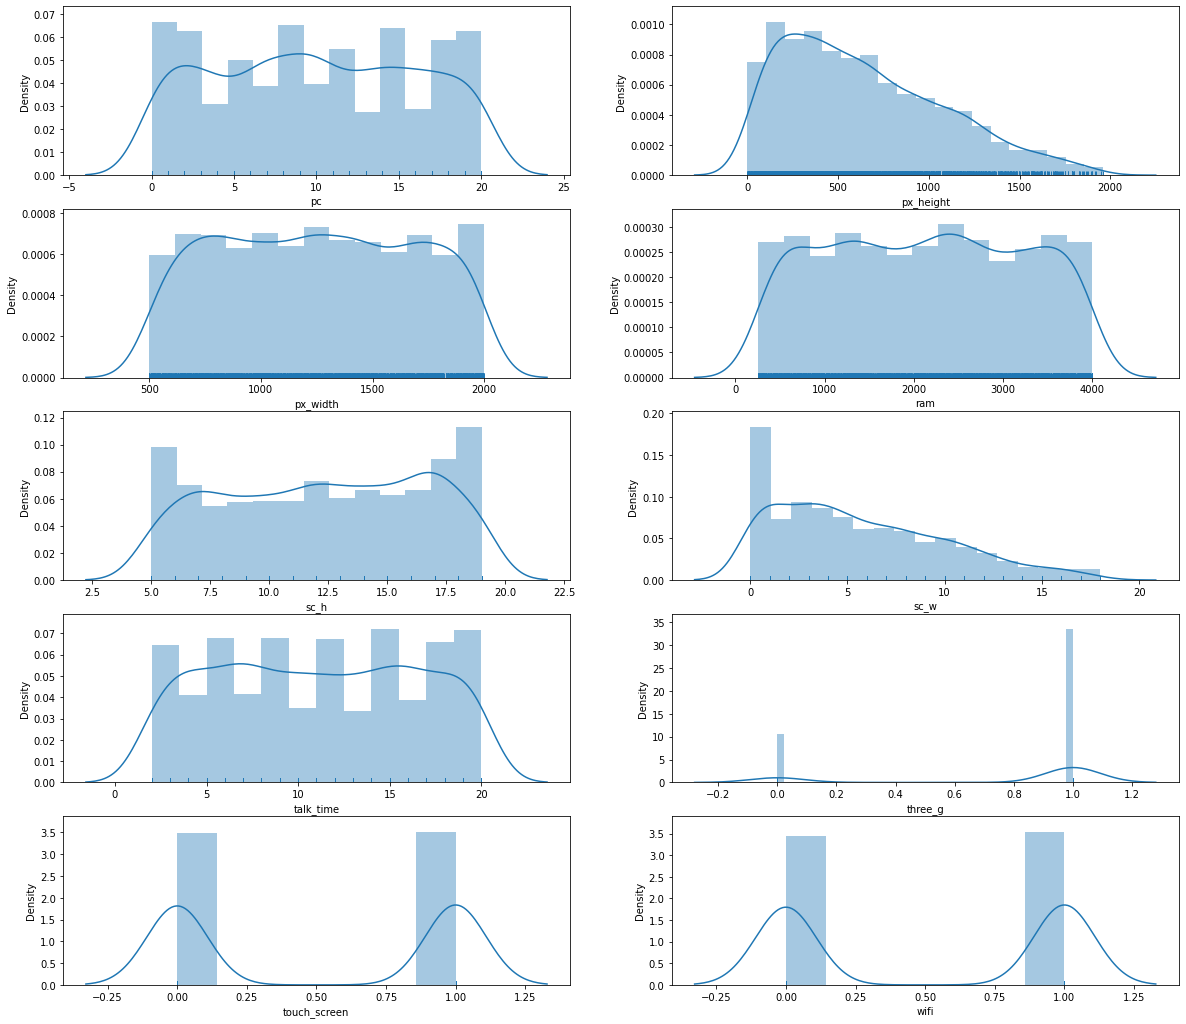

In [17]:
plt.figure(figsize=(20,18))
for i in range(len(dist_col2)):
  plt.subplot(5,2,i+1)
  sns.distplot(df[dist_col2[i]], hist = True, rug = True)

In [18]:
from scipy.stats import tmin

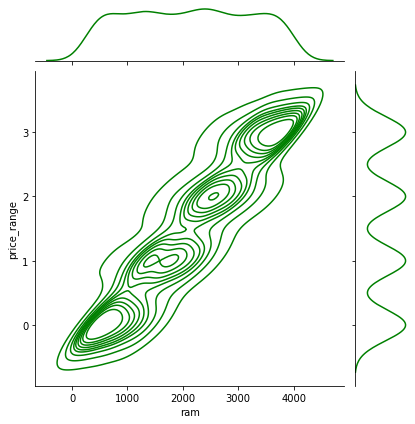

In [19]:
sns.jointplot(x='ram', y='price_range', data = df, kind = 'kde', color = 'green')


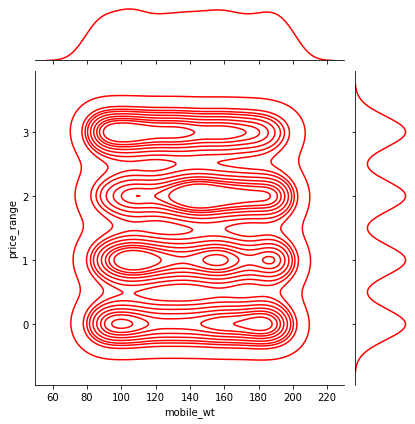

In [20]:
sns.jointplot(x='mobile_wt', y='price_range', data=df, kind = 'kde', color = 'Red')

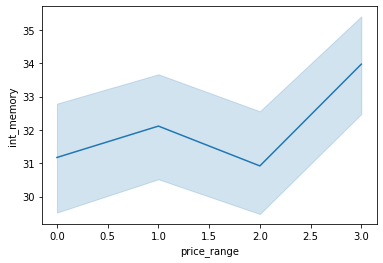

In [21]:
sns.lineplot(y='int_memory', x= 'price_range', data= df)

([<matplotlib.patches.Wedge at 0x7fc681d573d0>,
 [Text(-0.8054050133969238, 0.7492147652009409, '3g supported'),
  Text(0.8054050133969238, -0.749214765200941, 'not supported')],
 [Text(-0.43931182548923114, 0.4086625992005132, '76.2%'),
  Text(0.43931182548923114, -0.40866259920051323, '23.8%')])

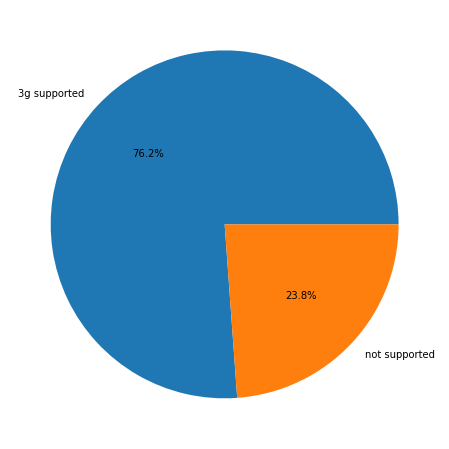

In [22]:
plt.figure(figsize=(8,8))
labels = ['3g supported','not supported']
values =df['three_g'].value_counts().values
plt.pie(values, labels=labels,autopct='%1.1f%%')

([<matplotlib.patches.Wedge at 0x7fc67f462850>,
 [Text(-0.0742421550154638, 1.097491732278043, '4g supported'),
  Text(0.07424215501546366, -1.0974917322780433, 'not supported')],
 [Text(-0.0404957209175257, 0.5986318539698416, '52.1%'),
  Text(0.04049572091752563, -0.5986318539698418, '47.9%')])

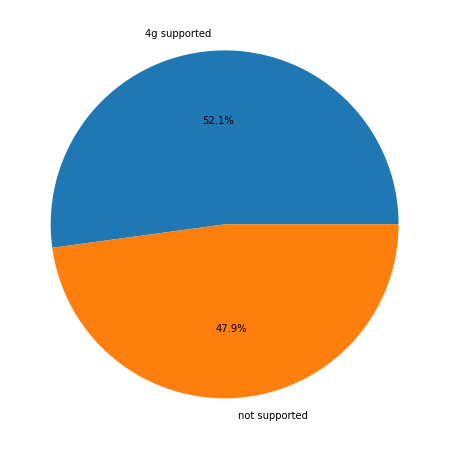

In [23]:
plt.figure(figsize=(8,8))
labels4g = ['4g supported','not supported']
values4g =df['four_g'].value_counts().values
plt.pie(values4g, labels=labels4g ,autopct='%1.1f%%')

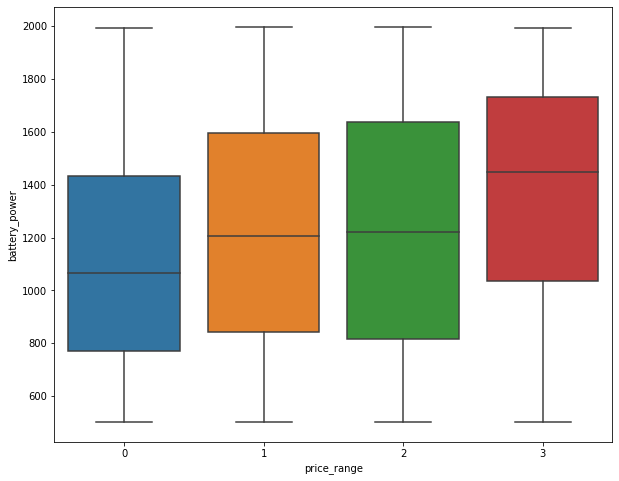

In [24]:
plt.figure(figsize=(10,8))
sns.boxplot(x='price_range', y='battery_power', data=df)

Text(0.5, 0, 'Mega Pixels')

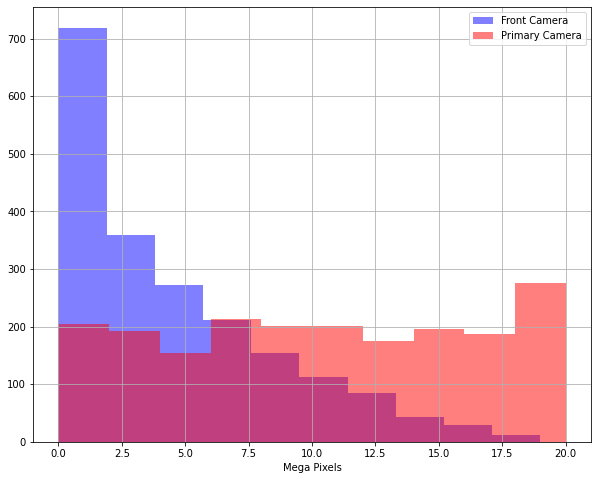

In [25]:
plt.figure(figsize=(10,8))
df['fc'].hist(alpha=0.5, color='blue',label='Front Camera')
df['pc'].hist(alpha=0.5, color='red', label='Primary Camera')
plt.legend()
plt.xlabel('Mega Pixels')

##<b> Outlier detection

In [26]:
box_list = ['clock_speed','fc','pc','sc_h','sc_w','int_memory','battery_power','px_height','px_width','ram']

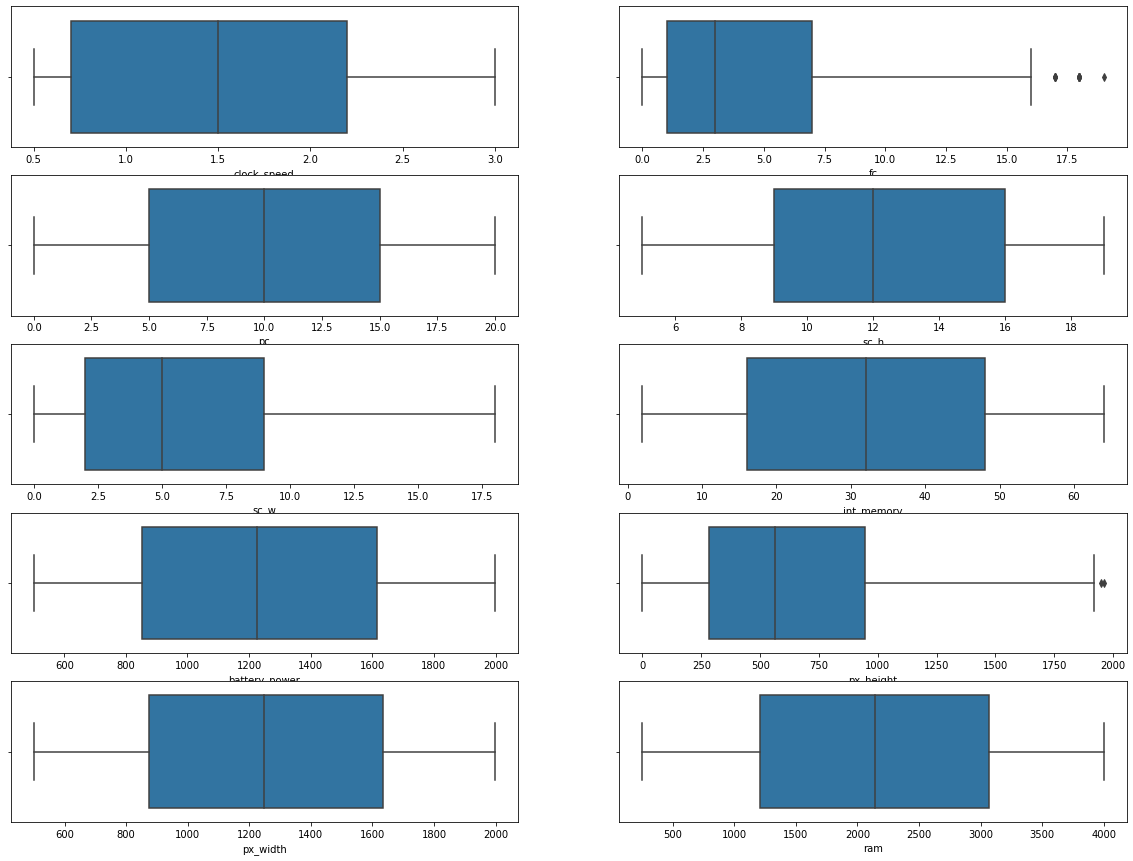

In [27]:
plt.figure(figsize=(20,15))
for i in range(len(box_list)):
  plt.subplot(5,2,i+1)
  sns.boxplot(df[box_list[i]])

##<b>Correlation Heatmap

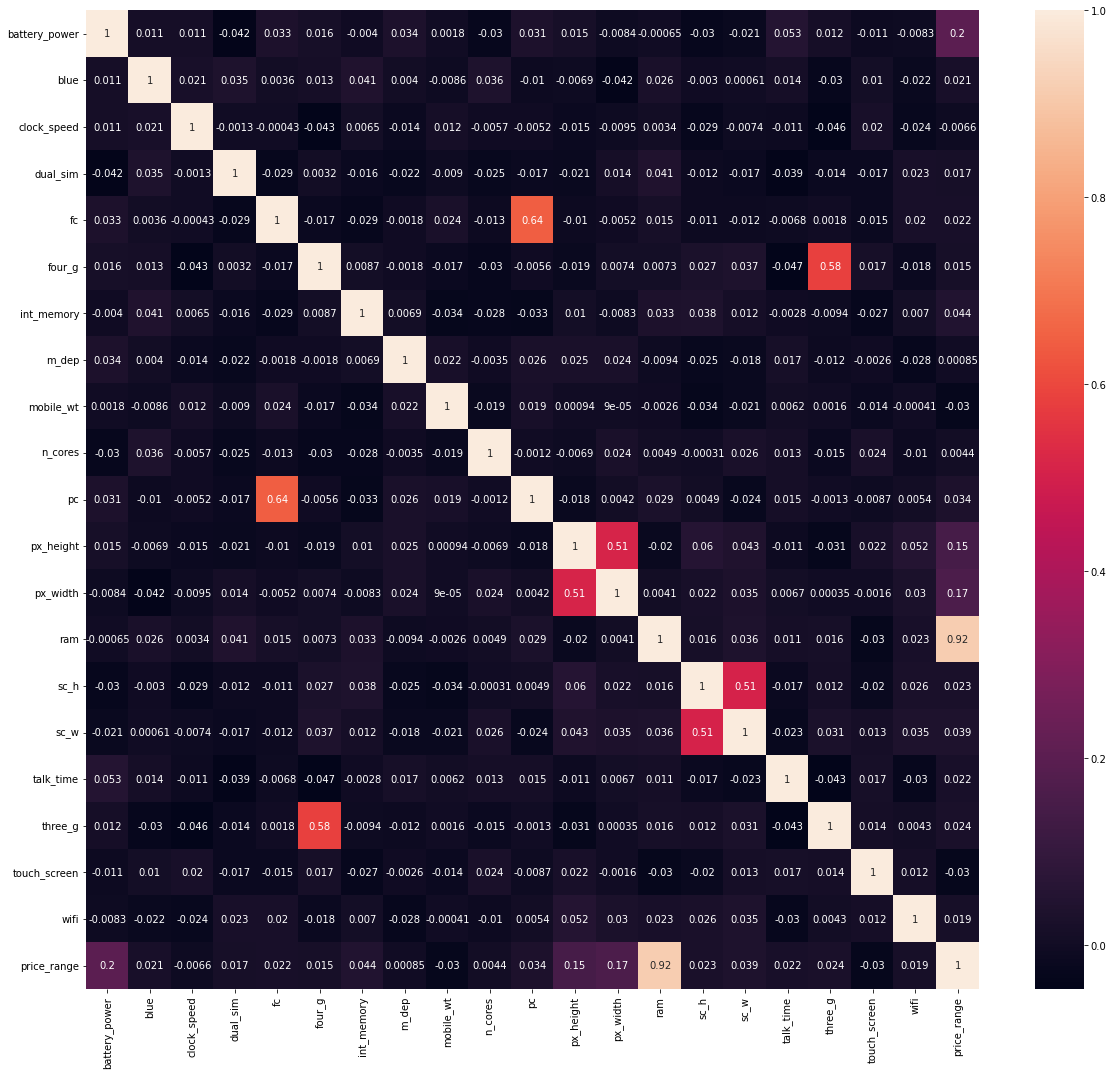

In [28]:
plt.figure(figsize=(20,18))
correlation = df.corr()
sns.heatmap(correlation,annot=True)

#<B>Modelling

##<B>Splitting the Dataset

In [29]:
X=df.drop('price_range', axis=1)


In [30]:
y = df['price_range']

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1600, 20)
(400, 20)
(1600,)
(400,)


###<b> Satandardization

In [33]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)


###<b> Fitting Models

####<b>1.K Nearest Neighbors

In [55]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train,y_train)


KNeighborsClassifier(n_neighbors=10)

In [43]:
knn.score(X_test,y_test)

0.5625

In [58]:
error_rate = []
for i in range(1,100):
  knn = KNeighborsClassifier(n_neighbors = i)
  knn.fit(X_train,y_train)
  pred = knn.predict(X_test)
  error_rate.append(np.mean(pred != y_test))

In [59]:
error_rate

[0.5575,
 0.5775,
 0.51,
 0.5,
 0.475,
 0.4875,
 0.4875,
 0.475,
 0.46,
 0.4375,
 0.4325,
 0.425,
 0.43,
 0.4225,
 0.405,
 0.385,
 0.3875,
 0.385,
 0.365,
 0.375,
 0.3625,
 0.355,
 0.33,
 0.3575,
 0.3425,
 0.34,
 0.3425,
 0.34,
 0.3525,
 0.3775,
 0.38,
 0.38,
 0.3825,
 0.3875,
 0.3725,
 0.365,
 0.3575,
 0.3625,
 0.3625,
 0.3725,
 0.3775,
 0.375,
 0.36,
 0.365,
 0.375,
 0.38,
 0.385,
 0.3725,
 0.3725,
 0.3825,
 0.3825,
 0.3725,
 0.38,
 0.3775,
 0.365,
 0.3675,
 0.3575,
 0.3625,
 0.3625,
 0.36,
 0.3575,
 0.3625,
 0.3575,
 0.3525,
 0.3475,
 0.36,
 0.3525,
 0.37,
 0.375,
 0.365,
 0.37,
 0.365,
 0.35,
 0.3475,
 0.345,
 0.3525,
 0.345,
 0.355,
 0.355,
 0.355,
 0.3575,
 0.3525,
 0.3525,
 0.345,
 0.355,
 0.385,
 0.375,
 0.3775,
 0.3725,
 0.3725,
 0.3675,
 0.38,
 0.3825,
 0.3675,
 0.36,
 0.3425,
 0.345,
 0.3375,
 0.3525]

Text(0, 0.5, 'Error rate')

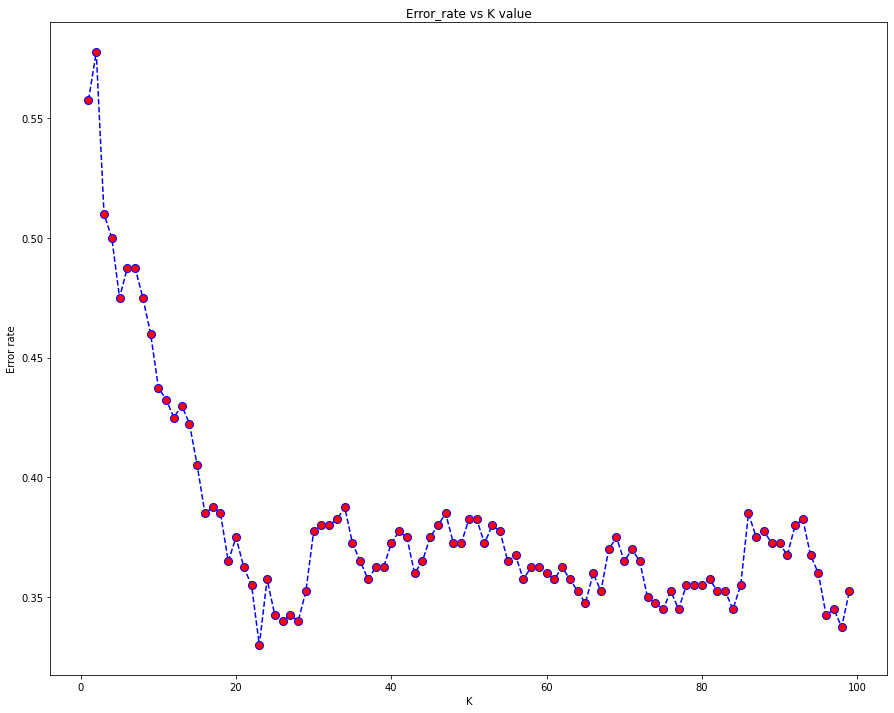

In [62]:
plt.figure(figsize=(15,12))
plt.plot(range(1,100), error_rate, color='blue', linestyle = 'dashed', marker ='o', markerfacecolor = 'red', markersize =8)
plt.title('Error_rate vs K value')
plt.xlabel('K')
plt.ylabel('Error rate')

In [76]:
from sklearn.metrics import classification_report, confusion_matrix
predicted = knn.predict(X_test)
print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

           0       0.75      0.84      0.79        95
           1       0.52      0.52      0.52        92
           2       0.50      0.64      0.56        99
           3       0.91      0.60      0.72       114

    accuracy                           0.65       400
   macro avg       0.67      0.65      0.65       400
weighted avg       0.68      0.65      0.65       400



In [80]:
matrix = confusion_matrix(y_test,predicted)
print(matrix)

[[80 14  1  0]
 [26 48 18  0]
 [ 1 28 63  7]
 [ 0  2 44 68]]


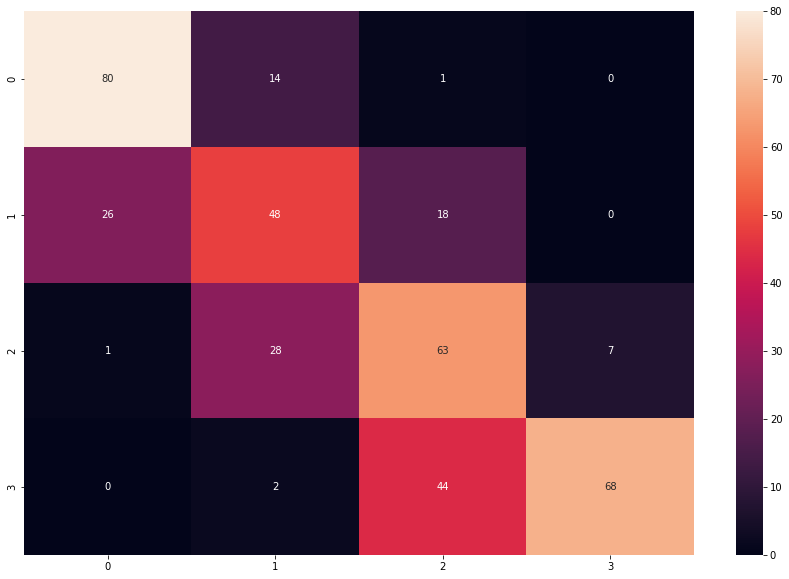

In [82]:
plt.figure(figsize=(15,10))
sns.heatmap(matrix, annot =True)

####<b> 2. Logistic Regression Model

In [72]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

LogisticRegression()

In [74]:
logmodel.score(X_test,y_test)

0.9125

####<b> XGBoost classifier

In [84]:
from xgboost import XGBClassifier
xgbmodel = XGBClassifier(random_state=0)
xgbmodel.fit(X_train,y_train)

XGBClassifier(objective='multi:softprob')

In [85]:
y_pred_train = xgbmodel.predict(X_train)
y_pred_test = xgbmodel.predict(X_test)

In [86]:
xgbmodel.score(X_test,y_test)

0.8925